# Анализ источников трафика и перераспределение бюджета отдела маркетинговой аналитики Яндекс.Афиши

**Цель:**  
Проанализировать данные Яндекс.Афиши и помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.  
  
**Исходные данные:**  
Данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:  
   * лог сервера с данными о посещениях сайта Яндекс.Афиши,
   * выгрузка всех заказов за этот период,
   * статистика рекламных расходов.

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-предобработка-данных" data-toc-modified-id="Загрузка-и-предобработка-данных"><span class="toc-item-num"></span>Загрузка и предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных"><span class="toc-item-num"></span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Расчет-продуктовых-метрик" data-toc-modified-id="Расчет-продуктовых-метрик"><span class="toc-item-num"></span>Расчет продуктовых метрик</a></span><ul class="toc-item"><li><span><a href="#DAU,-MAU,-WAU" data-toc-modified-id="DAU,-MAU,-WAU"><span class="toc-item-num"></span>DAU, MAU, WAU</a></span></li><li><span><a href="#Средняя-ежедневная-посещаемость-сайта" data-toc-modified-id="Средняя-ежедневная-посещаемость-сайта"><span class="toc-item-num"></span>Средняя ежедневная посещаемость сайта</a></span></li><li><span><a href="#Продолжительность-типичной-пользовательской-сессии" data-toc-modified-id="Продолжительность-типичной-пользовательской-сессии"><span class="toc-item-num"></span>Продолжительность типичной пользовательской сессии</a></span></li><li><span><a href="#Retention-Rate" data-toc-modified-id="Retention-Rate"><span class="toc-item-num"></span>Retention Rate</a></span></li></ul></li><li><span><a href="#Расчет-метрик-электронной-коммерции" data-toc-modified-id="Расчет-метрик-электронной-коммерции"><span class="toc-item-num"></span>Расчет метрик электронной коммерции</a></span><ul class="toc-item"><li><span><a href="#Среднее-время-с-момента-первого-посещения-до-момента-первой-покупки" data-toc-modified-id="Среднее-время-с-момента-первого-посещения-до-момента-первой-покупки"><span class="toc-item-num"></span>Среднее время с момента первого посещения до момента первой покупки</a></span></li><li><span><a href="#Среднее-количество-покупок-на-одного-покупателя-за-6-месяцев" data-toc-modified-id="Среднее-количество-покупок-на-одного-покупателя-за-6-месяцев"><span class="toc-item-num"></span>Среднее количество покупок на одного покупателя за 6 месяцев</a></span></li><li><span><a href="#Средний-чек" data-toc-modified-id="Средний-чек"><span class="toc-item-num"></span>Средний чек</a></span></li><li><span><a href="#LTV---lifetime-value" data-toc-modified-id="LTV---lifetime-value"><span class="toc-item-num"></span>LTV - lifetime value</a></span></li></ul></li><li><span><a href="#Расчет-маркетинговых-метрик" data-toc-modified-id="Расчет-маркетинговых-метрик"><span class="toc-item-num"></span>Расчет маркетинговых метрик</a></span><ul class="toc-item"><li><span><a href="#Общая-сумма-расходов-на-маркетинг" data-toc-modified-id="Общая-сумма-расходов-на-маркетинг"><span class="toc-item-num"></span>Общая сумма расходов на маркетинг</a></span></li><li><span><a href="#Средний-CAC-на-одного-покупателя" data-toc-modified-id="Средний-CAC-на-одного-покупателя"><span class="toc-item-num"></span>Средний CAC на одного покупателя</a></span><ul class="toc-item"><li><span><a href="#Средний-CAC-на-одного-покупателя-для-всего-проекта" data-toc-modified-id="Средний-CAC-на-одного-покупателя-для-всего-проекта"><span class="toc-item-num"></span>Средний CAC на одного покупателя для всего проекта</a></span></li><li><span><a href="#Средний-CAC-на-одного-покупателя-для-каждого-источника-трафика-по-месяцам" data-toc-modified-id="Средний-CAC-на-одного-покупателя-для-каждого-источника-трафика-по-месяцам"><span class="toc-item-num"></span>Средний CAC на одного покупателя для каждого источника трафика по месяцам</a></span></li></ul></li><li><span><a href="#ROMI" data-toc-modified-id="ROMI"><span class="toc-item-num"></span>ROMI</a></span></li></ul></li><li><span><a href="#Вывод-и-рекомендации" data-toc-modified-id="Вывод-и-рекомендации"><span class="toc-item-num"></span>Вывод и рекомендации</a></span></li></ul></div>

## Загрузка и предобработка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    visits = pd.read_csv('/datasets/visits_log.csv')
    orders = pd.read_csv('/datasets/orders_log.csv')
    costs = pd.read_csv('/datasets/costs.csv')
except:
    visits = pd.read_csv('visits_log.csv')
    orders = pd.read_csv('orders_log.csv')
    costs = pd.read_csv('costs.csv')

Ознакомимся с данными методами head(), info() и describe()

In [3]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
visits.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


Пропущенных значений нет. Для дальнейшего анализа необходимо:  
   * привести названия столбов к единому виду (прописные буквы, между словами вместо пробелов подчеркивание)
   * привести столбцы `Start Ts` и `End Ts` к типу данных datetime64

In [6]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [8]:
orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


Пропущенных значений нет. Для дальнейшего анализа необходимо:  
   * привести названия столбов к единому виду (прописные буквы, между словами вместо пробелов подчеркивание)
   * привести столбец `Buy Ts` к типу данных datetime64

In [9]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [10]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [11]:
costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


Пропущенных значений нет. Для дальнейшего анализа необходимо:  
   * привести столбец `dt` к типу данных datetime64
   * для меньшей путаницы переименовать столбец `dt` в `date`

### Предобработка данных

Приведем названия столбов к единому виду (прописные буквы, между словами вместо пробелов подчеркивание) и переименуем `dt` в `date`

In [12]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [13]:
orders.columns = ['buy_ts', 'revenue', 'uid']

In [14]:
costs.columns = ['source_id', 'date', 'costs']

Приведем определенные выше столбцы к типу данных datetime64

In [15]:
visits['start_ts'] = visits['start_ts'].astype('datetime64')

In [16]:
visits['end_ts'] = visits['end_ts'].astype('datetime64')

In [17]:
orders['buy_ts'] = orders['buy_ts'].astype('datetime64')

In [18]:
costs['date'] = costs['date'].astype('datetime64')

Исходные данные были в хорошем состоянии, понадобилось совсем немного их обработать для дальнейшего использования их в анализе. 

In [19]:
visits['device'].unique()

array(['touch', 'desktop'], dtype=object)

In [20]:
visits['device'] = visits['device'].astype('category')

In [21]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [22]:
visits['start_ts'].describe()

count                  359400
unique                 224303
top       2017-11-24 16:06:00
freq                       19
first     2017-06-01 00:01:00
last      2018-05-31 23:59:00
Name: start_ts, dtype: object

In [23]:
visits['end_ts'].describe()

count                  359400
unique                 224760
top       2017-11-24 16:51:00
freq                       23
first     2017-06-01 00:02:00
last      2018-06-01 01:26:00
Name: end_ts, dtype: object

In [24]:
orders['buy_ts'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object

In [25]:
costs['date'].describe()

count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: date, dtype: object

Данные в нужном диапазоне, где-то захвачено также 1 июня 2018 года. Выясним, какие источники трафика у нас существуют и как посетители по ним распределены

In [26]:
visits['source_id'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  9, 10], dtype=int64)

In [27]:
visits.groupby('source_id').agg({'uid':['count', 'nunique']}).reset_index()

source_id     uid        
              count nunique
0         1   34121   18999
1         2   47626   26245
2         3   85610   74756
3         4  101794   83525
4         5   66905   56974
5         6       6       6
6         7      36      34
7         9   13277    9264
8        10   10025    8067

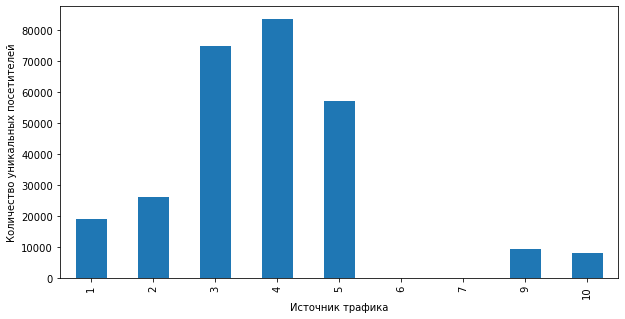

In [28]:
visits.groupby('source_id').agg({'uid':'nunique'}).plot(kind='bar', legend=False, figsize=(10,5));
plt.xlabel('Источник трафика')
plt.ylabel('Количество уникальных посетителей')
plt.show()

По распределению уже можем обратить внимание на 6 и 7 источник трафика ввиду малого количества визитов и пользователей

Проверим данные на дубликаты

In [29]:
visits.duplicated().sum()

0

In [30]:
orders.duplicated().sum()

0

In [31]:
costs.duplicated().sum()

0

Дубликатов нет, теперь данные точно готовы к анализу

## Расчет продуктовых метрик

### DAU, MAU, WAU

Оценим пользовательскую активность с помощью метрик DAU, MAU, WAU - показывающие количество уникальных пользователей в день/месяц/неделю.

In [32]:
visits['year']  = visits['start_ts'].dt.year
visits['month'] = visits['start_ts'].dt.month
visits['week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date

Рассчитаем DAU, WAU и MAU

In [33]:
dau = visits.groupby('session_date').agg({'uid':'nunique'})

In [34]:
mau = visits.groupby(['year', 'month']).agg({'uid':'nunique'})

In [35]:
wau = visits.groupby(['year', 'week']).agg({'uid':'nunique'})

Определим средние значения этих метрик за весь период

In [36]:
dau.mean()

uid    907.991758
dtype: float64

In [37]:
mau.mean()

uid    23228.416667
dtype: float64

In [38]:
wau.mean()

uid    5716.245283
dtype: float64

Отобразим изменения метрик во времени на графиках

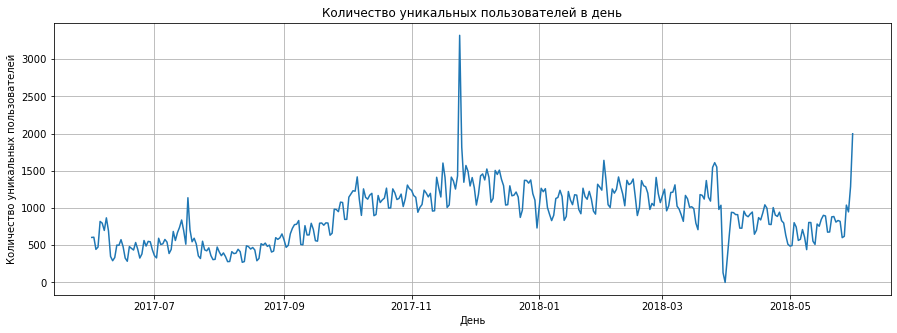

In [39]:
dau.plot(title='Количество уникальных пользователей в день', figsize=(15,5), grid=True, legend=False);
plt.xlabel('День')
plt.ylabel('Количество уникальных пользователей')
plt.show()

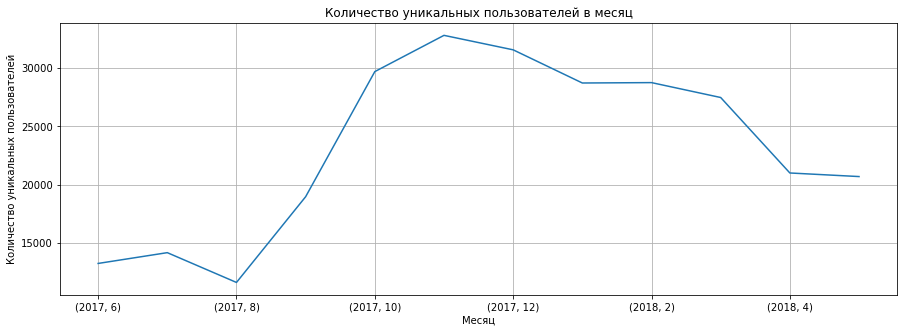

In [40]:
mau.plot(title='Количество уникальных пользователей в месяц', figsize=(15,5), grid=True, legend=False);
plt.xlabel('Месяц')
plt.ylabel('Количество уникальных пользователей')
plt.show()

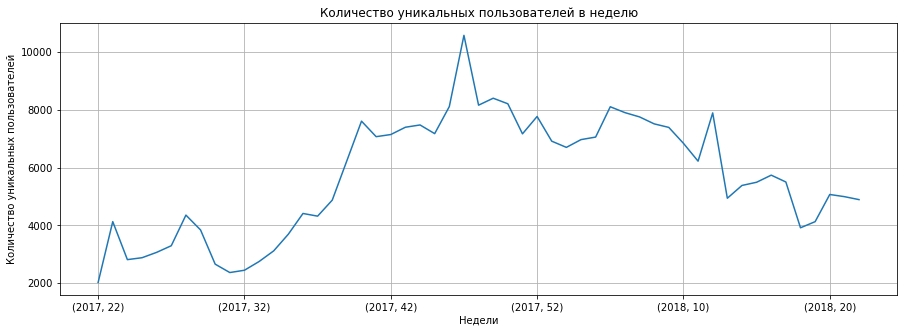

In [41]:
wau.plot(title='Количество уникальных пользователей в неделю', figsize=(15,5), grid=True, legend=False);
plt.xlabel('Недели')
plt.ylabel('Количество уникальных пользователей')
plt.show()

В среднем ежедневно количество уникальных пользователей = 907, еженедельно = 5716, ежемесячно = 23228.  
По графикам можно увидеть небольшие пики в течение всего периода (вероятно были проведены маркетинговые компании) и выбивающийся пик в конце 2017 года - предновогоднее время, когда весь мир ищет подарки для своих родных, а также ищет места времяпровождений на длинные каникулы. В апреле 2018 виден заметный спад, вероятно в этот день проводились технические работы либо сервис не работал. 

На этом шаге также можно попробовать рассчитать Sticky Factor для оценки  вовлеченности аудитории:
- Sticky Factor за неделю $=\dfrac{DAU}{WAU}\times 100\%$;
- Sticky Factor за месяц $=\dfrac{DAU}{MAU}\times 100\%$.

Sticky Factor за неделю

In [42]:
(dau.mean() / wau.mean()) * 100

uid    15.884409
dtype: float64

Sticky Factor за месяц

In [43]:
(dau.mean() / mau.mean()) * 100

uid    3.90897
dtype: float64

 Sticky Factor - метрика, которая позволяет определить, регулярно ли игроки заходят в игру.

### Средняя ежедневная посещаемость сайта

Определим, сколько раз за день пользователи в среднем заходят на сайт, а также построим график, отражающий изменения метрики во времени

In [44]:
temp = visits.groupby('session_date').agg({'uid':['nunique','count']}).reset_index()

In [45]:
temp.columns = ['session_date', 'users', 'sessions']

In [46]:
temp.head()

,session_date,users,sessions
0,2017-06-01,605,664
1,2017-06-02,608,658
2,2017-06-03,445,477
3,2017-06-04,476,510
4,2017-06-05,820,893


In [47]:
temp['avg_visits'] = temp['sessions'] / temp['users']

In [48]:
temp.head()

,session_date,users,sessions,avg_visits
0,2017-06-01,605,664,1.097521
1,2017-06-02,608,658,1.082237
2,2017-06-03,445,477,1.071910
3,2017-06-04,476,510,1.071429
4,2017-06-05,820,893,1.089024


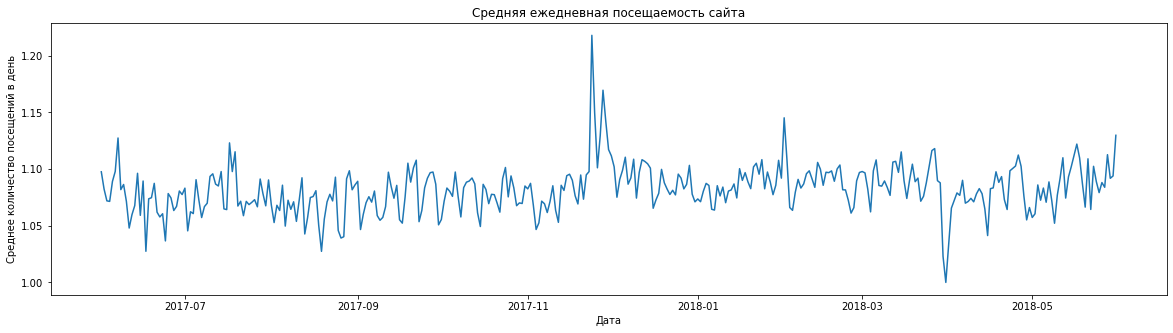

In [49]:
temp.plot('session_date', 'avg_visits', figsize=(20,5), title='Средняя ежедневная посещаемость сайта', legend=False);
plt.xlabel('Дата')
plt.ylabel('Среднее количество посещений в день')
plt.show()

In [50]:
temp['avg_visits'].mean()

1.0821696440039723

В среднем ежедневно на сайт заходит 1 пользователь

### Продолжительность типичной пользовательской сессии

Исследуем, сколько времени пользователи проводят на сайте и узнаем продолжительность типичной пользовательской сессии за весь период

Чтобы выбрать подходящую среднюю меру, постройте график распределения. Изменение продолжительности сессий во времени изучать необязательно;

In [51]:
sessions_per_user = visits.groupby(['year', 'month']).agg({'uid': ['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (sessions_per_user['n_sessions'] / sessions_per_user['n_users'])

In [52]:
sessions_per_user

n_sessions  n_users  sessions_per_user
year month                                        
2017 6           16505    13259           1.244815
     7           17828    14183           1.256998
     8           14355    11631           1.234202
     9           23907    18975           1.259921
     10          37903    29692           1.276539
     11          43969    32797           1.340641
     12          41983    31557           1.330386
2018 1           36939    28716           1.286356
     2           37182    28749           1.293332
     3           35679    27473           1.298693
     4           26515    21008           1.262138
     5           26635    20701           1.286653

В месяц один пользователь в среднем проводит в приложении максимум 1 сессию, не сказать, что сайт используется регулярно. Посмотрим на продолжительность типичной пользовательской сессии за весь период (или по другому, показатель ASL)

In [53]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

In [54]:
visits['session_duration_sec'].mean()

643.506488592098

Мы вычислили ASL равному 643 сек., однако, взглянем на распределение:

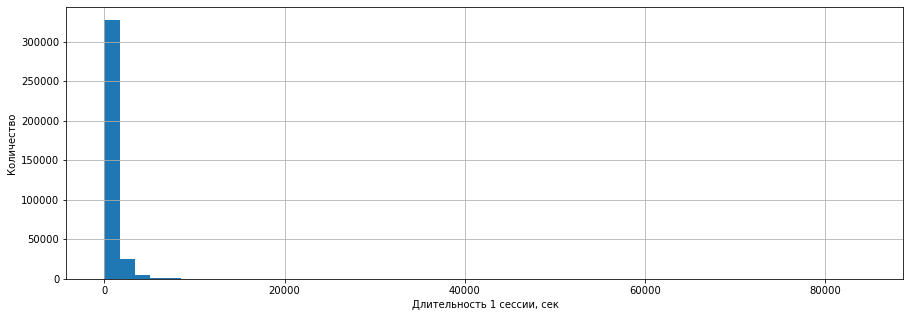

In [55]:
visits['session_duration_sec'].hist(bins=50, figsize=(15,5));
plt.xlabel('Длительность 1 сессии, сек')
plt.ylabel('Количество');

Когда распределение близко к нормальному или нормальное — можно смотреть на среднюю или медиану. Наше — не из таких, рассчитаем моду (значение в выборке, которое встречается чаще всего):

In [56]:
visits['session_duration_sec'].mode()

0    60
dtype: int64

ASL = 60 сек., для сервиса Яндекс.Афиша вполне нормально, если пользователи успевают за это время выбрать и оплатить товар, что мы определим позднее.

Оценим сильно ли меняется метрика в течение года

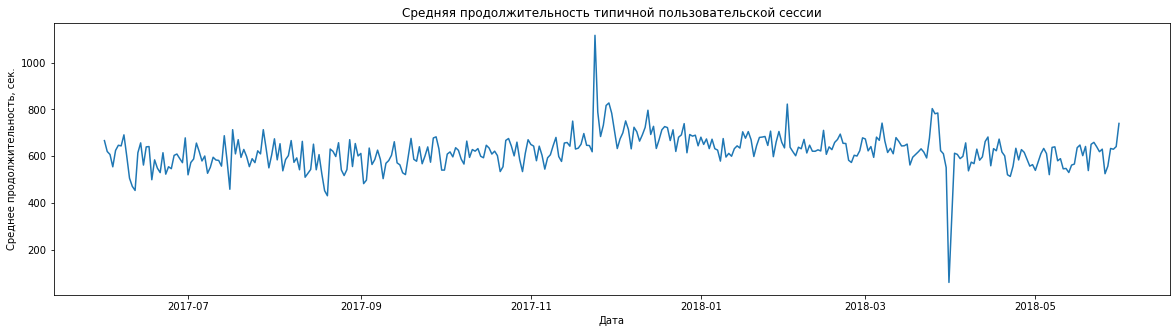

In [57]:
visits.groupby('session_date')['session_duration_sec'].mean().plot(figsize=(20,5), title='Средняя продолжительность типичной пользовательской сессии');
plt.xlabel('Дата')
plt.ylabel('Среднее продолжительность, сек.')
plt.show()

Значения варьируются в небольшом диапазоне, но по графику можно выделить наибольшие и наименьшие пики - во время новогодних праздников и во время предположительных технических работах/не работе сервиса соответственно.  
Выявим дни с минимальным и максимальным значением метрики

In [58]:
visits[visits['session_duration_sec'] == visits['session_duration_sec'].max()]

,device,end_ts,source_id,start_ts,uid,year,month,week,session_date,session_duration_sec
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986,2018,3,12,2018-03-25,84480


In [59]:
visits[visits['session_duration_sec']==visits['session_duration_sec'].min()]

,device,end_ts,source_id,start_ts,uid,year,month,week,session_date,session_duration_sec
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0
28,desktop,2017-11-09 15:53:00,4,2017-11-09 15:53:00,17892541477379911957,2017,11,45,2017-11-09,0
32,desktop,2017-11-30 12:29:00,4,2017-11-30 12:29:00,13410401624913285510,2017,11,48,2017-11-30,0
54,desktop,2018-02-23 16:52:00,10,2018-02-23 16:52:00,13423278602430425332,2018,2,8,2018-02-23,0
...,...,...,...,...,...,...,...,...,...,...
358511,desktop,2017-09-15 11:31:00,4,2017-09-15 11:31:00,6406595666419694649,2017,9,37,2017-09-15,0
358514,desktop,2018-01-16 23:57:00,5,2018-01-16 23:57:00,6457848932283204350,2018,1,3,2018-01-16,0
358522,desktop,2017-11-08 13:39:00,4,2017-11-08 13:39:00,6761309174945977743,2017,11,45,2017-11-08,0
358524,touch,2018-01-18 13:38:00,4,2018-01-18 13:38:00,4558073034499185861,2018,1,3,2018-01-18,0


In [60]:
dau[dau['uid'] == dau['uid'].max()]

,uid
session_date,
2017-11-24,3319


In [61]:
dau.loc[dau['uid'] == dau['uid'].min()]

,uid
session_date,
2018-03-31,1


Максимальная продолжительность сессии была длинною в 84480 сек (это 1408 минут = 23.4 часа) 23 марта 2018 года. Максимальный dau был 24 ноября 2017. Даты не совпадают, вероятнее всего, пользователь не закрыл вкладку в браузере.  
Минимальная продолжительность сессии была длинною в 0 сек и количество таких сессий достигает 35794 штук. Минимальный dau был 31 марта 2018. Пыталась посчитать количество сессий продолжительностью 0 сек 31.03.2018, но условие visits[visits['session_date'] == '2018-03-31'] выдавало пустой датафрейм, разными способами пыталась, но почему-то условие некорректное, вероятно строка содержит "невидимые символы", иных объяснений нет(

### Retention Rate

Рассчитаем Retention Rate (Коэффициент удержания), применяя когортный анализ. Визуализируем изменения метрики во времени на графике

Определим событие и период — на их основе сформируем когорту. Возьмём дату, когда пользователь впервые проявил активность на сайте

In [62]:
first_activity_date = visits.groupby('uid')['session_date'].min()

In [63]:
first_activity_date

uid
11863502262781          2018-03-01
49537067089222          2018-02-06
297729379853735         2017-06-07
313578113262317         2017-09-18
325320750514679         2017-09-30
                           ...    
18446403737806311543    2017-11-30
18446424184725333426    2017-12-06
18446556406699109058    2018-01-01
18446621818809592527    2017-12-27
18446676030785672386    2017-10-04
Name: session_date, Length: 228169, dtype: object

In [64]:
first_activity_date.name = 'first_activity_date'

In [65]:
visits = visits.join(first_activity_date, on='uid')

In [66]:
visits.head()

,device,end_ts,source_id,start_ts,uid,year,month,week,session_date,session_duration_sec,first_activity_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-27


Построим когорты периодом в 1 месяц

In [67]:
visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')

In [68]:
visits['first_activity_month']

0        2017-12-01
1        2018-02-01
2        2017-07-01
3        2018-03-01
4        2017-12-01
            ...    
359395   2017-07-01
359396   2018-01-01
359397   2018-03-01
359398   2017-11-01
359399   2017-09-01
Name: first_activity_month, Length: 359400, dtype: datetime64[ns]

Когортой станет столбец first_activity_month — месяц, в котором была замечена первая активность пользователя. Определим lifetime каждой когорты

In [69]:
visits['first_month'] = visits['start_ts'].astype('datetime64[M]')

In [70]:
visits['age'] = (visits['first_month'] - visits['first_activity_month']) / np.timedelta64(1, 'M')

In [71]:
visits['age'] = visits['age'].round().astype('int')

Посчитаем для каждой когорты количество активных пользователей на определённый «месяц жизни»:

In [72]:
users = visits.groupby(['first_activity_month', 'age']).agg({'uid':'nunique'}).reset_index()

In [73]:
users

,first_activity_month,age,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
...,...,...,...
73,2018-03-01,1,861
74,2018-03-01,2,557
75,2018-04-01,0,15709
76,2018-04-01,1,760


Чтобы найти Retention Rate, нужно сперва получить число пользователей, изначально бывших в когорте, и на него разделить число пользователей в каждую следующий месяц.

In [74]:
initial_users_count = users[users['age'] == 0][['first_activity_month', 'uid']]

In [75]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

In [76]:
cohorts = pd.merge(users, initial_users_count, on='first_activity_month')

In [77]:
cohorts

,first_activity_month,age,uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
...,...,...,...,...
73,2018-03-01,1,861,20589
74,2018-03-01,2,557,20589
75,2018-04-01,0,15709,15709
76,2018-04-01,1,760,15709


Наконец, рассчитаем Retention Rate. Разделим количество активных пользователей в каждом месяце на исходное число пользователей в когорте

In [78]:
cohorts['retention_rate'] = cohorts['uid'] / cohorts['cohort_users']

Построим сводную таблицу и создадим тепловую карту

In [79]:
retention_rate_pivot = cohorts.pivot_table(
    index = 'first_activity_month',
    columns = 'age',
    values = 'retention_rate',
    aggfunc = 'sum')

In [80]:
retention_rate_pivot

age,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
def heatmap_1(output, title, vmin, vmax, fmt):
    output.index = output.index.astype('str')
    sns.set(style='white')
    plt.figure(figsize=(17, 9))
    plt.title(title)
    sns.heatmap(output, annot=True, fmt=fmt, linewidths=1, linecolor='gray', vmin=vmin, vmax=vmax); 
    plt.xlabel('Age')
    plt.ylabel('Cohorts')
    plt.show()

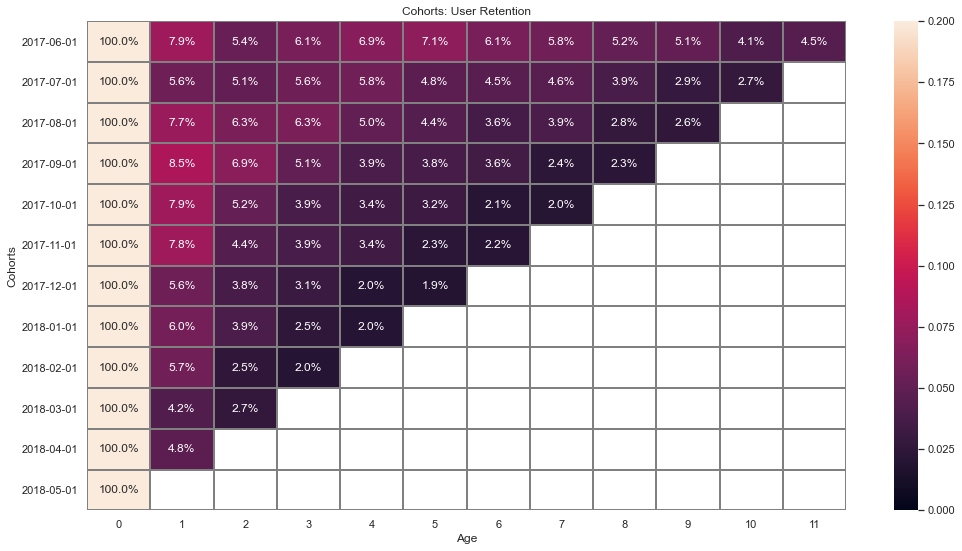

In [82]:
heatmap_1(retention_rate_pivot, 'Cohorts: User Retention', 0, 0.2, '.1%')

Найдем средний Retention Rate на второй месяц «жизни» когорт

In [83]:
cohorts.loc[cohorts['age'] == 1, 'retention_rate'].mean()

0.06516659710392834

Retention Rate в первую неделю убывает по когортам с течением времени. Если для когорты пользователей пришедших с 1 июня по 31 июля 2017 года Retention Rate составляет 7,9%, то для когорты пользователей пришедших с 1 апреля по 31 мая 2018 года уже 4,8%. Так за 11 месяцев коэффициент упал на 3,1%, что является существенным показателем при таких данных (в процентах коэффициент упал на 40 %).  
Это говорит, что с каждой новой когортой поведение покупателей меняется. Возможно, были выбраны неэффективные источники трафика или ухудшилось качество работы службы поддержки.

## Расчет метрик электронной коммерции

### Среднее время с момента первого посещения до момента первой покупки

Определим среднее время с момента первого посещения до момента первой покупки. Для этого определим время первого посещения и первой покупки, затем объединим данным методом merge с характеристикой inner и вычислим среднее значение. 

In [84]:
first_activity_date = visits.groupby('uid')['start_ts'].min()

In [85]:
first_activity_date.head()

uid
11863502262781    2018-03-01 17:27:00
49537067089222    2018-02-06 15:55:00
297729379853735   2017-06-07 18:47:00
313578113262317   2017-09-18 22:49:00
325320750514679   2017-09-30 14:29:00
Name: start_ts, dtype: datetime64[ns]

In [86]:
first_buy_date = orders.groupby('uid')['buy_ts'].min()

In [87]:
first_buy_date.head()

uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
2464366381792757   2018-01-28 15:54:00
2551852515556206   2017-11-24 10:14:00
Name: buy_ts, dtype: datetime64[ns]

In [88]:
diff = pd.merge(first_activity_date, first_buy_date, on='uid', how='inner').reset_index()

In [89]:
diff['difference_time'] = diff['buy_ts'] - diff['start_ts']

In [90]:
diff.sample(10, random_state = 42)

,uid,start_ts,buy_ts,difference_time
36356,18357718370675156442,2017-07-10 21:16:00,2017-07-10 21:16:00,0 days 00:00:00
9676,4895814233811878408,2018-05-20 01:04:00,2018-05-20 01:25:00,0 days 00:21:00
6252,3161153125087544165,2017-10-12 10:55:00,2018-05-03 15:06:00,203 days 04:11:00
6324,3190294299303850023,2017-07-14 23:35:00,2017-10-31 21:49:00,108 days 22:14:00
22061,11143629993135001686,2018-01-04 18:45:00,2018-01-04 18:53:00,0 days 00:08:00
32411,16365607822312673677,2017-11-03 12:37:00,2017-11-03 12:47:00,0 days 00:10:00
3653,1839170823730250140,2017-09-17 09:32:00,2017-10-07 13:27:00,20 days 03:55:00
5557,2816602293618437087,2018-05-29 20:53:00,2018-05-29 21:02:00,0 days 00:09:00
12296,6147446968913716702,2017-09-18 22:51:00,2017-09-18 23:03:00,0 days 00:12:00
34823,17573785730329683309,2018-02-15 14:39:00,2018-02-15 14:50:00,0 days 00:11:00


In [91]:
diff['difference_time'].mean()

Timedelta('16 days 21:40:10.550064402')

В среднем с момента первого посещения сайта до совершения покупки проходит 16 дней и 21 час (почти 17 дней)

In [92]:
diff['difference_time_days'] = (diff['difference_time'] / np.timedelta64(1, 'D')).round().astype('int')

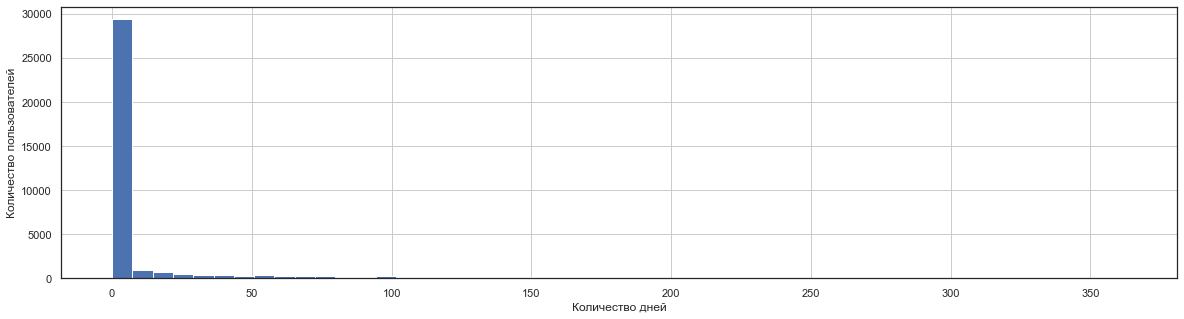

In [93]:
diff['difference_time_days'].hist(bins=50, figsize=(20,5));
plt.xlabel('Количество дней')
plt.ylabel('Количество пользователей')
plt.show()

Когда распределение близко к нормальному или нормальное — можно смотреть на среднюю или медиану. Наше — не из таких, рассчитаем моду (значение в выборке, которое встречается чаще всего):

In [94]:
diff['difference_time'].mode()

0   0 days 00:01:00
dtype: timedelta64[ns]

Мода равна 1 минуте, а среднее время с момента первого посещения сайта до совершения покупки равно 16 дней и 21 час (почти 17 дней). Разброс данных большой, а причины такого разброса видны на гистограмме выше, наибольшее количество пользователей совершают покупку в первые дни с момента первого посещения сайта. 

### Среднее количество покупок на одного покупателя за 6 месяцев

Чтобы ответить на вопрос о том, каково среднее количество покупок на одного покупателя за 6 месяцев, нам нужно построить когортный отчет от даты первой покупки.
    
    
Алгоритм рассчетов следующий:
    
1) найдем число покупателей в каждой когорте
    
2) добавим в информацию о покупках месяц первой покупки
    
3) считаем возраст каждой когорты
    
4) добавляем в когортный отчет количество покупателей в каждой когорте и считаем количество заказов на каждого покупателя.
    
5) последний шаг - нахождение среднего числа покупок на покупателя за 6 месяцев. Чтобы посчитать среднее число покупок на 6 месяц, можно из сводной таблицы по возростному когортному отчету, показывающему накопительное число покупок на покупателя, взять значения по индексу 5 (6-я когорта будет находиться под индексом 5, потому что индексация в Python начинается с 0) и применить метод mean.    

In [95]:
#сделала копию, чтобы не ломать структуру проекта на текущем этапе
orders_copy = orders

In [96]:
orders_copy['order_month'] = orders_copy['buy_ts'].astype('datetime64[M]')

In [97]:
orders_copy = orders_copy.merge(orders_copy.groupby('uid').agg({'order_month': 'min'})
    .rename(columns = {'order_month': 'first_order_month'})
    .reset_index(), on = 'uid', how = 'left')

In [98]:
orders_copy.head()

,buy_ts,revenue,uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


In [99]:
cohort_sizes = (orders_copy.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index())
cohort_sizes.columns = ['first_order_month', 'n_buyers']

In [100]:
cohorts = (orders_copy.groupby(['first_order_month', 'order_month']).agg({'revenue': 'count'}).reset_index())
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

In [101]:
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

In [102]:
report['mean_orders'] = report['revenue'] / report['n_buyers']

In [103]:
report_pivot = report.pivot_table(index='first_order_month', columns='age', values='mean_orders', aggfunc='sum').cumsum(axis = 1)

In [104]:
report_pivot

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.163618,1.251112,1.337123,1.448838,1.593178,1.700939,1.837370,1.923381,2.028176,2.103806,2.151261,2.193772
2017-07-01,1.136765,1.188768,1.251170,1.305252,1.342694,1.385335,1.417057,1.443058,1.473219,1.485699,1.513261,NaN
2017-08-01,1.118978,1.197810,1.270803,1.329927,1.391971,1.437226,1.472993,1.529927,1.563504,1.597080,NaN,NaN
2017-09-01,1.136381,1.221232,1.283611,1.347152,1.373111,1.415343,1.457187,1.478884,1.502518,NaN,NaN,NaN
2017-10-01,1.143779,1.216129,1.253456,1.281567,1.311290,1.335023,1.354839,1.383641,NaN,NaN,NaN,NaN
2017-11-01,1.179368,1.276648,1.321245,1.372948,1.406273,1.420730,1.445724,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.152635,1.214237,1.260324,1.301164,1.320785,1.344741,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.121554,1.187963,1.235102,1.254076,1.277201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.121611,1.182416,1.205149,1.224322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
report_pivot[5].mean()

1.4341911542792218

Cреднее количество покупок на одного покупателя за 6 месяцев получилось 1.43

### Средний чек

Рассчитаем средний чек, применяя группировку по времени совершения покупки. Построим график, отражающий изменения метрики во времени

Средний чек рассчитывается делением общей суммы совершённых покупок на их количество и рассматривается показатель в динамике, таким образом рассмотрим величину среднего чека за каждый месяц

In [106]:
orders['year']  = orders['buy_ts'].dt.year
orders['month'] = orders['buy_ts'].dt.month

In [107]:
avr_check = orders.groupby(['year', 'month']).agg({'revenue':'sum', 'buy_ts':'count'})

In [108]:
avr_check['avr_check'] = avr_check['revenue'] / avr_check['buy_ts']

In [109]:
avr_check

revenue  buy_ts  avr_check
year month                             
2017 6       9557.49    2354   4.060106
     7      12539.47    2363   5.306589
     8       8758.78    1807   4.847139
     9      18345.51    3387   5.416448
     10     27987.70    5679   4.928280
     11     27069.93    5659   4.783518
     12     36388.60    6218   5.852139
2018 1      19417.13    4721   4.112927
     2      25560.54    5281   4.840095
     3      28834.59    5326   5.413930
     4      16858.06    3273   5.150645
     5      20735.98    4346   4.771279
     6          3.42       1   3.420000

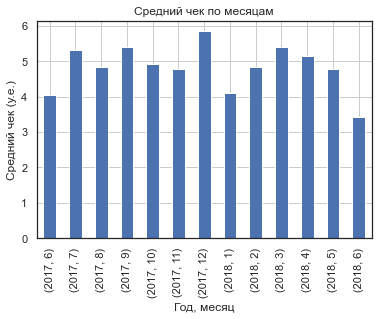

In [110]:
avr_check['avr_check'].plot(kind='bar', grid=True, title='Средний чек по месяцам');
plt.xlabel('Год, месяц')
plt.ylabel('Средний чек (у.е.)')
plt.show()

In [111]:
round(orders['revenue'].mean(), 2)

5.0

Средний чек в течение года варьируется от 3.42 до 5.85 условных единиц, пик приходится на декабрь 2017, который и ранее был замечен высоким спросом в связи с новогодними праздниками.  
Общий средний чек найден = 5 у.е. и он является корректным

### LTV - lifetime value

LTV - «пожизненная» ценность клиента — итоговая сумма денег, которую один клиент приносит в среднем со всех своих покупок. Определим, как меняется LTV на покупателя по когортам.  
Рассчитаем средний LTV по когортам за 6 месяцев (в расчёт включим когорты, «прожившие» не менее 6 месяцев). Маржинальность сервиса — 100%.  
Изменения метрики во времени отразим на графике

Найдем дату первой покупки каждого покупателя

In [112]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

In [113]:
first_orders = orders.groupby('uid').agg({'order_month':'min'}).reset_index()

In [114]:
first_orders.columns = ['uid', 'first_order_month']

In [115]:
first_orders.head()

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


Посчитаем количество новых покупателей (n_buyers) за каждый месяц

In [116]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()

In [117]:
cohort_sizes.columns = ['first_order_month', 'n_buyers']

In [118]:
cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами

In [119]:
orders = orders.merge(first_orders, on='uid', how='left')

In [120]:
orders.sample(5, random_state = 40)

,buy_ts,revenue,uid,order_month,year,month,first_order_month
27236,2017-12-30 18:11:00,5.74,17406652218724982840,2017-12-01,2017,12,2017-12-01
39028,2018-03-08 15:28:00,3.67,14481163132396345939,2018-03-01,2018,3,2018-03-01
29427,2018-01-15 09:45:00,1.75,4835774891411392734,2018-01-01,2018,1,2017-12-01
23304,2017-12-11 11:17:00,6.05,7046737606684150807,2017-12-01,2017,12,2017-11-01
48910,2018-05-25 13:34:00,0.61,15451279466969545031,2018-05-01,2018,5,2018-05-01


Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку

In [121]:
cohorts = orders.groupby(['first_order_month', 'order_month']).agg({'revenue':'sum'}).reset_index()

In [122]:
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


Добавим в таблицу cohorts2 данные о том, сколько людей первый раз совершили покупку в каждый месяц

In [123]:
report = pd.merge(cohorts, cohort_sizes, on='first_order_month')

In [124]:
report.head()

,first_order_month,order_month,revenue,n_buyers
0,2017-06-01,2017-06-01,9557.49,2023
1,2017-06-01,2017-07-01,981.82,2023
2,2017-06-01,2017-08-01,885.34,2023
3,2017-06-01,2017-09-01,1931.30,2023
4,2017-06-01,2017-10-01,2068.58,2023


LTV считают не из выручки, а из валовой прибыли. Для этого умножим величину маржинальности на выручку

In [125]:
margin_rate = 1.0

In [126]:
report['gp'] = report['revenue'] * margin_rate

In [127]:
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')

In [128]:
report['age'] = report['age'].round().astype('int')

Наконец, найдём LTV. Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте. Для наглядности визуализируем когорты в виде сводной таблицы

In [129]:
report['ltv'] = report['gp'] / report['n_buyers']

In [130]:
output = report.pivot_table(index = 'first_order_month', columns='age', values='ltv')

In [131]:
output

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,0.485329,0.437637,0.954671,1.022531,0.735502,0.950440,0.581592,0.553213,0.605788,0.571261,0.256856
2017-07-01,6.010218,0.335211,0.623531,0.358976,0.176791,0.156048,0.120208,0.141820,0.161232,0.147145,0.155673,NaN
2017-08-01,5.276518,0.471993,0.458482,0.391277,0.494051,0.283540,0.210664,0.405007,0.292212,0.187978,NaN,NaN
2017-09-01,5.644529,1.117586,0.520930,3.975792,0.400558,0.647067,0.701608,0.243150,0.184006,NaN,NaN,NaN
2017-10-01,5.003733,0.535763,0.191394,0.157145,0.151560,0.120362,0.084816,0.115470,NaN,NaN,NaN,NaN
2017-11-01,5.154683,0.399233,0.199556,0.324952,0.148013,0.053879,0.114928,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,0.260374,0.925097,1.065275,0.312930,0.338047,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,0.294758,0.304281,0.142778,0.062698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,0.278274,0.078515,0.074144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


LTV накопительная метрика, применим метод cumsum() для расчета ltv

In [132]:
output = output.cumsum(axis=1)

In [133]:
output

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07-01,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,NaN
2017-08-01,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,NaN,NaN
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,NaN,NaN,NaN
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,NaN,NaN,NaN,NaN
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,4.430394,4.734675,4.877453,4.940151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,4.435262,4.513777,4.587921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
def heatmap_2(output, title, fmt):
    output.index = output.index.astype('str')
    sns.set(style='white')
    plt.figure(figsize=(17, 9))
    plt.title(title)
    sns.heatmap(output, annot=True, fmt=fmt, linewidths=1, linecolor='gray'); 
    plt.xlabel('Age')
    plt.ylabel('Cohorts')
    plt.show()

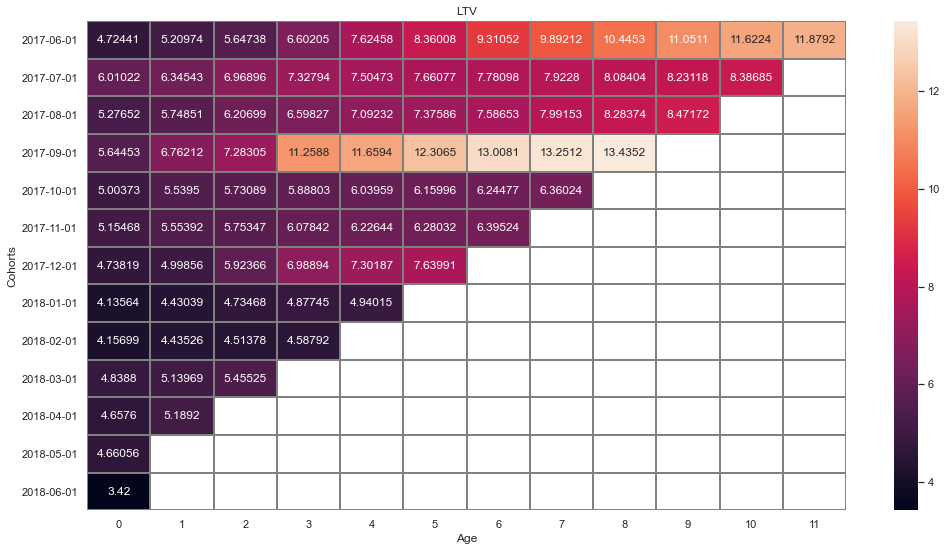

In [135]:
heatmap_2(output, 'LTV','.6')

Ограничим по условию задачи: "в расчёт включаем когорты, «прожившие» не менее 6 месяцев"

In [136]:
ltv_6_month = output.loc['2017-06-01':'2017-11-01']

In [137]:
ltv_6_month

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07-01,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,NaN
2017-08-01,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,NaN,NaN
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,NaN,NaN,NaN
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,NaN,NaN,NaN,NaN
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,NaN,NaN,NaN,NaN,NaN


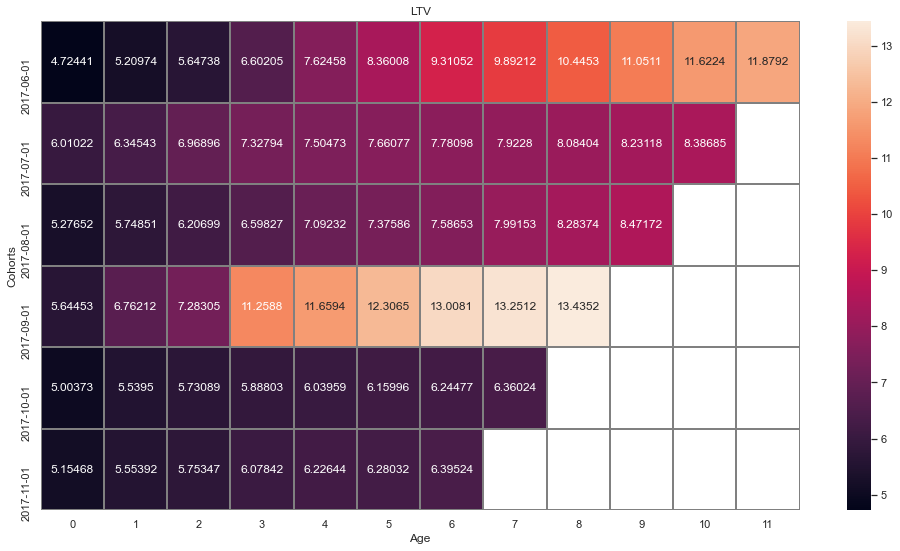

In [138]:
heatmap_2(ltv_6_month, 'LTV','.6')

In [139]:
ltv_6_month.mean()[5]

8.02390918500994

Среднее LTV по когортам за 6 месяцев равняется 8.02. На графике видна интересная ситуация, пользователи, пришедшие в сентябре 2017 на 3 месяц "жизни" резко вырос LTV, что на первый взгляд может говорить о хорошо проведенной маркетинговой компании.

## Расчет маркетинговых метрик

### Общая сумма расходов на маркетинг

Посчитаем общую сумму расходов на маркетинг и выясним, как траты распределены по источникам.  
Визуализируем изменения метрик во времени

In [140]:
costs['costs'].sum()

329131.62

Общая сумма расходов равна 329131,62 у.е.

Посмотрим, как траты распределены по источникам

In [141]:
costs.groupby('source_id').agg({'costs':'sum'}).reset_index()

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


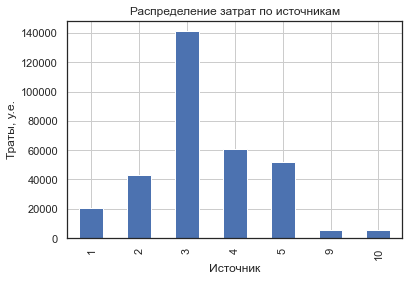

In [142]:
costs.groupby('source_id').agg({'costs':'sum'}).plot(kind='bar', legend = False, grid=True);
plt.title('Распределение затрат по источникам')
plt.ylabel('Траты, у.е.')
plt.xlabel('Источник')
plt.show()

А также посмотрим, как траты распределены по времени

In [143]:
costs.groupby('date').agg({'costs':'sum'}).reset_index()

,date,costs
0,2017-06-01,735.26
1,2017-06-02,721.19
2,2017-06-03,450.85
3,2017-06-04,761.16
4,2017-06-05,821.44
...,...,...
359,2018-05-27,532.87
360,2018-05-28,619.44
361,2018-05-29,784.79
362,2018-05-30,1183.00


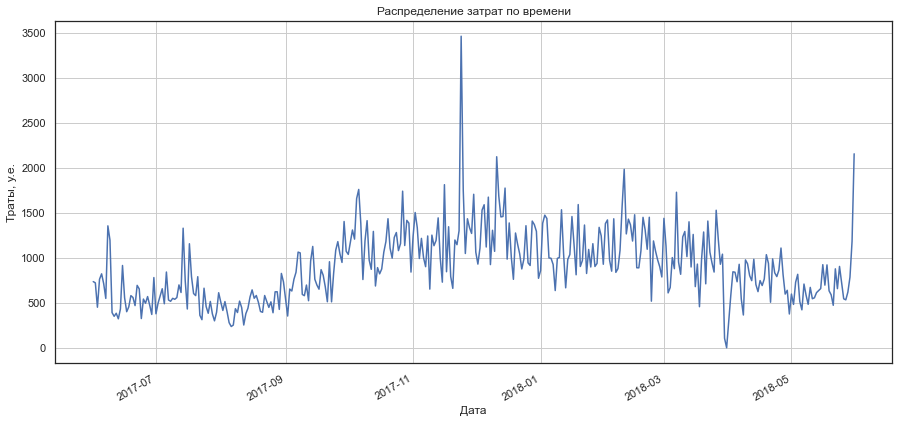

In [144]:
costs.groupby('date').agg({'costs':'sum'}).plot(legend = False, grid=True, figsize=(15,7));
plt.title('Распределение затрат по времени')
plt.ylabel('Траты, у.е.')
plt.xlabel('Дата')
plt.show()

Общая сумма расходов равна 329131.62 у.е. Самые большие траты были сделаны на 3 источник = 141321.63 у.е., а самые маленькие траты на источник 9 = 5517.49 у.е.  
По времени самые большие траты были сделаны в предновогоднюю маркетинговую компанию, высокие показатели в предновогоднее время были замечены и по другим метрикам ранее. 

### Средний CAC на одного покупателя

Рассчитаем средний CAC на одного покупателя для всего проекта и для каждого источника трафика.  
Отразим изменения метрик на графиках

#### Средний CAC на одного покупателя для всего проекта

CAC - стоимость привлечения клиента - сумма денег, во сколько обходится новый клиент компании. Для определения CAC найдем расходы и количество пользователей для каждой когорты

In [145]:
costs['month'] = costs['date'].astype('datetime64[M]')

Определим расходы за каждый месяц

In [146]:
cohorts = costs.groupby('month').agg({'costs':'sum'}).reset_index()

In [147]:
cohorts

,month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


Таблица report была создана на этапе расчета ltv, добавим в нее информацию о расходах

In [148]:
report = report.merge(cohorts, right_on = 'month', left_on='first_order_month')

In [149]:
report.head()

,first_order_month,order_month,revenue,n_buyers,gp,age,ltv,month,costs
0,2017-06-01,2017-06-01,9557.49,2023,9557.49,0,4.724414,2017-06-01,18015.0
1,2017-06-01,2017-07-01,981.82,2023,981.82,1,0.485329,2017-06-01,18015.0
2,2017-06-01,2017-08-01,885.34,2023,885.34,2,0.437637,2017-06-01,18015.0
3,2017-06-01,2017-09-01,1931.30,2023,1931.30,3,0.954671,2017-06-01,18015.0
4,2017-06-01,2017-10-01,2068.58,2023,2068.58,4,1.022531,2017-06-01,18015.0


Количество пользователей уже известно, поэтому определим CAC делением расходов на количество новых пользователей

In [150]:
report['cac'] = report['costs'] / report['n_buyers']

In [151]:
report

,first_order_month,order_month,revenue,n_buyers,gp,age,ltv,month,costs,cac
0,2017-06-01,2017-06-01,9557.49,2023,9557.49,0,4.724414,2017-06-01,18015.00,8.905091
1,2017-06-01,2017-07-01,981.82,2023,981.82,1,0.485329,2017-06-01,18015.00,8.905091
2,2017-06-01,2017-08-01,885.34,2023,885.34,2,0.437637,2017-06-01,18015.00,8.905091
3,2017-06-01,2017-09-01,1931.30,2023,1931.30,3,0.954671,2017-06-01,18015.00,8.905091
4,2017-06-01,2017-10-01,2068.58,2023,2068.58,4,1.022531,2017-06-01,18015.00,8.905091
...,...,...,...,...,...,...,...,...,...,...
73,2018-03-01,2018-04-01,1063.05,3533,1063.05,1,0.300892,2018-03-01,30415.27,8.608907
74,2018-03-01,2018-05-01,1114.87,3533,1114.87,2,0.315559,2018-03-01,30415.27,8.608907
75,2018-04-01,2018-04-01,10600.69,2276,10600.69,0,4.657597,2018-04-01,22289.38,9.793225
76,2018-04-01,2018-05-01,1209.92,2276,1209.92,1,0.531599,2018-04-01,22289.38,9.793225


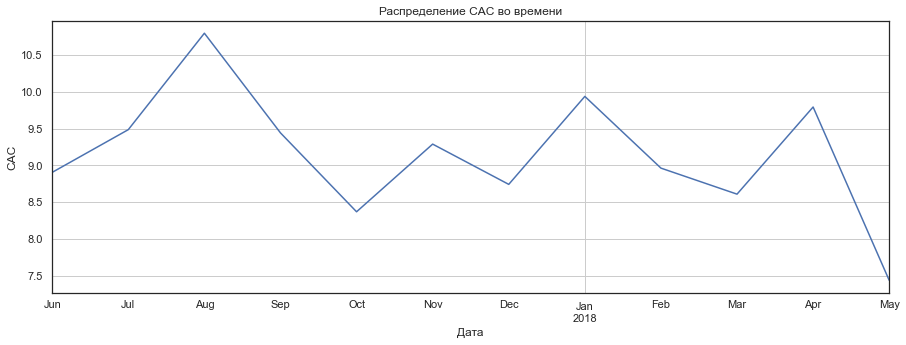

In [152]:
report.pivot_table(index='first_order_month', values = 'cac').plot(grid=True, legend = False, figsize=(15,5));
plt.ylabel('CAC')
plt.xlabel('Дата')
plt.title('Распределение CAC во времени')
plt.show()

In [153]:
report['cac'].mean()

9.319905176921111

Средний CAC на одного покупателя для всего проекта равняется 9.31, что является достаточно высоким покзателем (выше, чем среднее LTV по когортам за 6 месяцев). Наибольшие затраты на привлечение одного покупателя замечены в августе 2017 (CAC = 10.796015). График имеет пилообразную форму, что говорит о периодически проводимых маркетинговых компаний, которые влияют на поток покупателей. 

#### Средний CAC на одного покупателя для каждого источника трафика по месяцам

Для рассмотрения метрики во времени нужно разбиение по месяцам. На данном этапе применить какой-либо метод к таблице report_2 будет трудоемко, определим метрику с самого начала, добавив группировку по месяцам

In [154]:
monthly_source_costs = costs.groupby(['source_id', 'month']).agg({'costs':'sum'}).reset_index()

In [155]:
monthly_source_costs.head()

,source_id,month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75


Посчитаем количество пользователей в разрезе каждого источника трафика с течением времени

In [156]:
users = visits.sort_values(by=['uid', 'start_ts']).groupby('uid').agg({'source_id':'first', 'first_month':'first'})

In [157]:
users.head()

,source_id,first_month
uid,,
11863502262781,3,2018-03-01
49537067089222,2,2018-02-01
297729379853735,3,2017-06-01
313578113262317,2,2017-09-01
325320750514679,5,2017-09-01


In [158]:
users = users.reset_index().rename(columns={'first_month':'month'})

Отбираем только плательщиков

In [159]:
buyers = users.query('uid in @orders.uid')

In [160]:
buyers = buyers.groupby(['source_id', 'month']).agg({'uid':'nunique'}).reset_index()

In [161]:
buyers.head()

,source_id,month,uid
0,1,2017-06-01,240
1,1,2017-07-01,184
2,1,2017-08-01,126
3,1,2017-09-01,248
4,1,2017-10-01,350


Объеденим найденную информацию о расходах и количестве пользователей

In [162]:
report = pd.merge(buyers, monthly_source_costs, on=['source_id', 'month'])

In [163]:
report

,source_id,month,uid,costs
0,1,2017-06-01,240,1125.61
1,1,2017-07-01,184,1072.88
2,1,2017-08-01,126,951.81
3,1,2017-09-01,248,1502.01
4,1,2017-10-01,350,2315.75
...,...,...,...,...
79,10,2018-01-01,103,614.35
80,10,2018-02-01,113,480.88
81,10,2018-03-01,166,526.41
82,10,2018-04-01,98,388.25


Определим CAC по уже известной формуле

In [164]:
report['cac'] = report['costs'] / report['uid']

In [165]:
report.head(15)

,source_id,month,uid,costs,cac
0,1,2017-06-01,240,1125.61,4.690042
1,1,2017-07-01,184,1072.88,5.830870
2,1,2017-08-01,126,951.81,7.554048
3,1,2017-09-01,248,1502.01,6.056492
4,1,2017-10-01,350,2315.75,6.616429
5,1,2017-11-01,331,2445.16,7.387190
6,1,2017-12-01,328,2341.20,7.137805
7,1,2018-01-01,222,2186.18,9.847658
8,1,2018-02-01,254,2204.48,8.679055
9,1,2018-03-01,252,1893.09,7.512262


Отобразим информацию на графике для рассмотрения метрики во времени

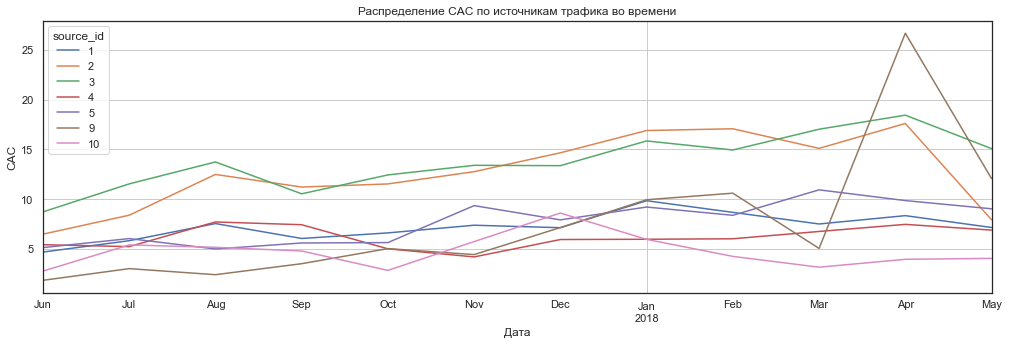

In [166]:
report.pivot_table(index='month', columns='source_id', values='cac', aggfunc='mean').plot(figsize=(17,5), grid=True);
plt.ylabel('CAC')
plt.xlabel('Дата')
plt.title('Распределение CAC по источникам трафика во времени')
plt.show()

Без разбивки по месяцам метрика CAC принимает следущие значения:

In [167]:
report_1 = report.groupby('source_id')[['costs', 'uid']].sum()

In [168]:
report_1['cac'] = report_1['costs'] / report_1['uid']

In [169]:
report_1

,costs,uid,cac
source_id,,,
1,20833.27,2899,7.186364
2,42806.04,3506,12.209367
3,141321.63,10473,13.493901
4,61073.60,10296,5.931779
5,51757.10,6931,7.467479
9,5517.49,1088,5.071222
10,5822.49,1329,4.381106


По графику и по сводным таблицам можно сказать, что на маркетинг для привлечения покупателей по источнику трафика 3 много, а количество пришедших новых клиентов не соответствует ожиданиям. Вероятно, источник трафика 3 самый популярный (Интернет, или конкретная соц. сеть). Также по графику отличился источник трафика 9, в апреле 2018 имеется пик, достигающий 26.677857, и, если посмотреть на параметры, то в этот месяц было привлечено наименьшее число пользователей. 

In [170]:
report[(report['month'] == '2018-04-01') & (report['source_id'] == 9)]

,source_id,month,uid,costs,cac
70,9,2018-04-01,14,373.49,26.677857


In [171]:
report['uid'].min()

14

### ROMI

Рассчитаем ROMI по когортам в разрезе источников. Код отразим в отдельной функции, которую вызовем в цикле для построения графиков по всем источникам трафика. 

In [172]:
#source - источник трафика
def romi(source):
    print('Источник трафика =', source)
    
    #Определяем новых пользователей и отбираем только платящих из нужного источника трафика
    users = visits.sort_values(by=['uid', 'start_ts']).groupby('uid').agg({'source_id':'first', 'first_month':'first'}) 
    source_users = users.query('source_id == @source').index.values 
    source_orders = orders.query('uid in @source_users')
    
    #Определяем когорты
    cohort_sizes = source_orders.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
    cohort_sizes.columns = ['first_order_month', 'n_buyers']
    cohorts = source_orders.groupby(['first_order_month', 'order_month']).agg({'revenue':'sum'}).reset_index()
    report = pd.merge(cohorts, cohort_sizes, on='first_order_month')
    margin_rate = 1.0
    
    #Определяем LTV
    report['gp'] = report['revenue'] * margin_rate
    report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
    report['age'] = report['age'].round().astype('int')
    report['ltv'] = report['gp'] / report['n_buyers']
    
    #Вывод графика LTV
    output_ltv = report.pivot_table(index='first_order_month', columns = 'age', values = 'ltv', aggfunc='mean')
    output_ltv = output_ltv.cumsum(axis=1).fillna(0)
    heatmap_2(output_ltv, 'LTV', '.6')
    
    #Определяем CAC
    source_costs = costs.query('source_id == @source')
    source_costs = source_costs.groupby('month').agg({'costs':'sum'}).reset_index()
    report = pd.merge(report, source_costs, left_on='order_month', right_on='month')
    report['cac'] = report['costs'] / report['n_buyers']
    
    #Вычисляем ROMI
    report['romi'] = report['ltv'] / report['cac']
    
    output = report.pivot_table(index='first_order_month', columns = 'age', values = 'romi', aggfunc='mean')
    output = output.cumsum(axis=1).fillna(0)
    
    heatmap_2(output, 'ROMI', '.1%')
    return

In [173]:
source_n = report['source_id'].unique()

In [174]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

Источник трафика = 1


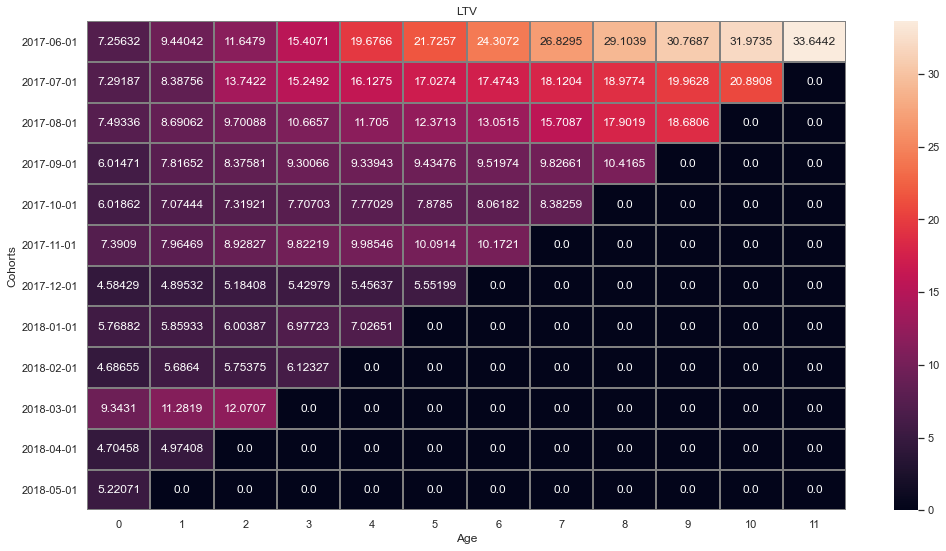

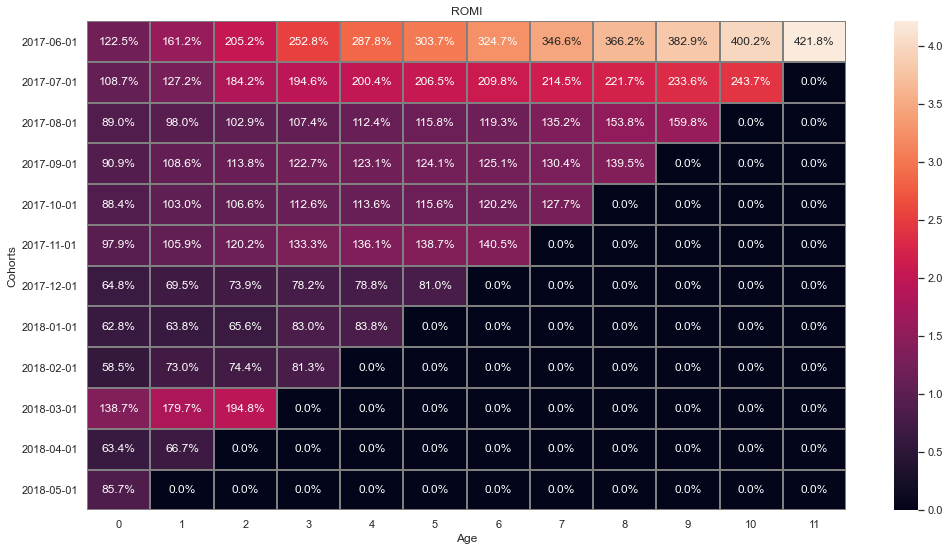

Источник трафика = 2


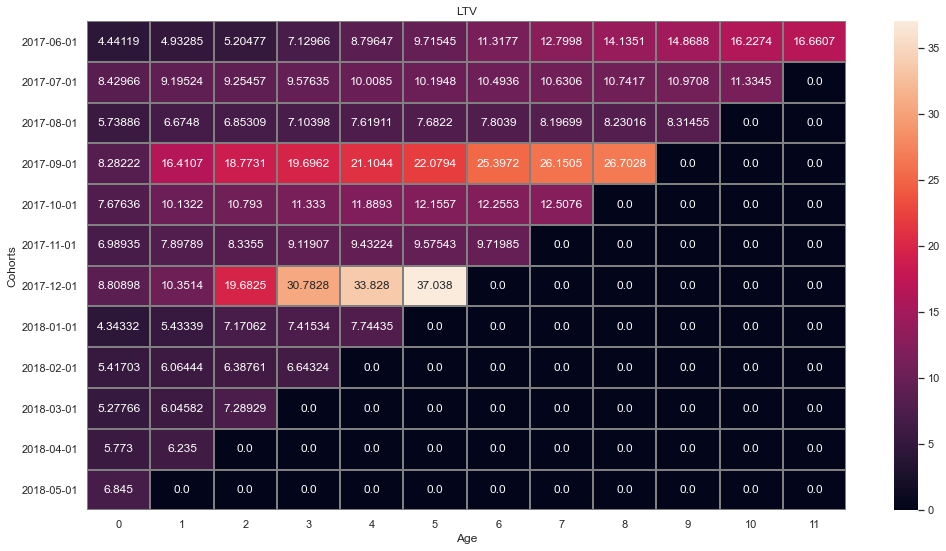

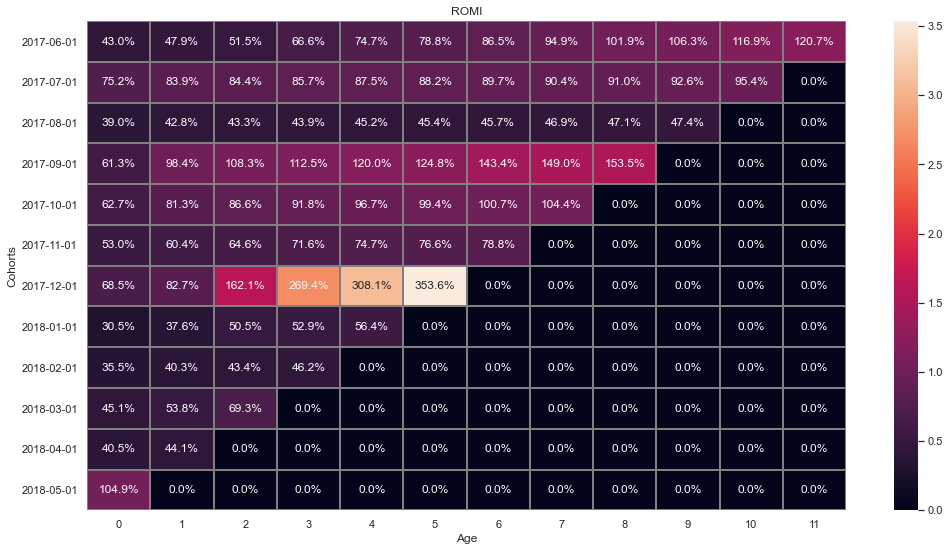

Источник трафика = 3


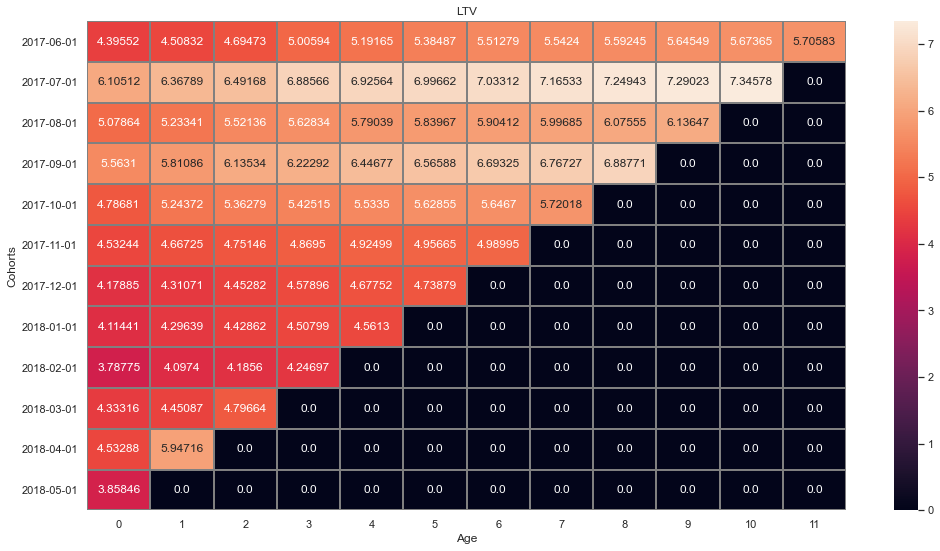

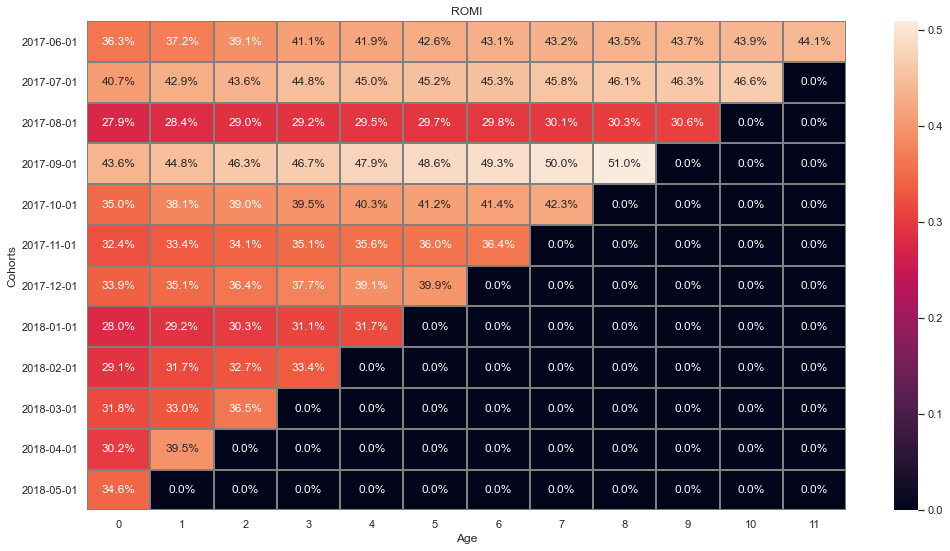

Источник трафика = 4


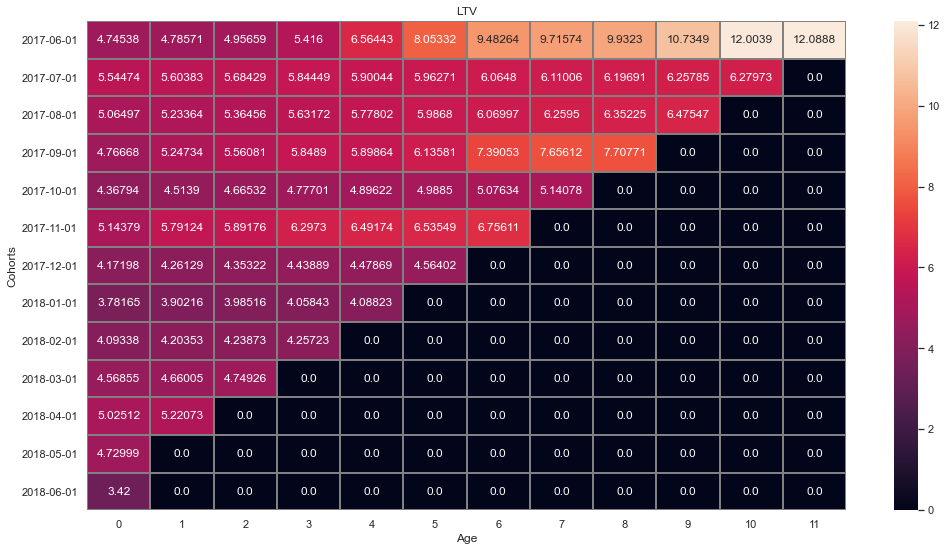

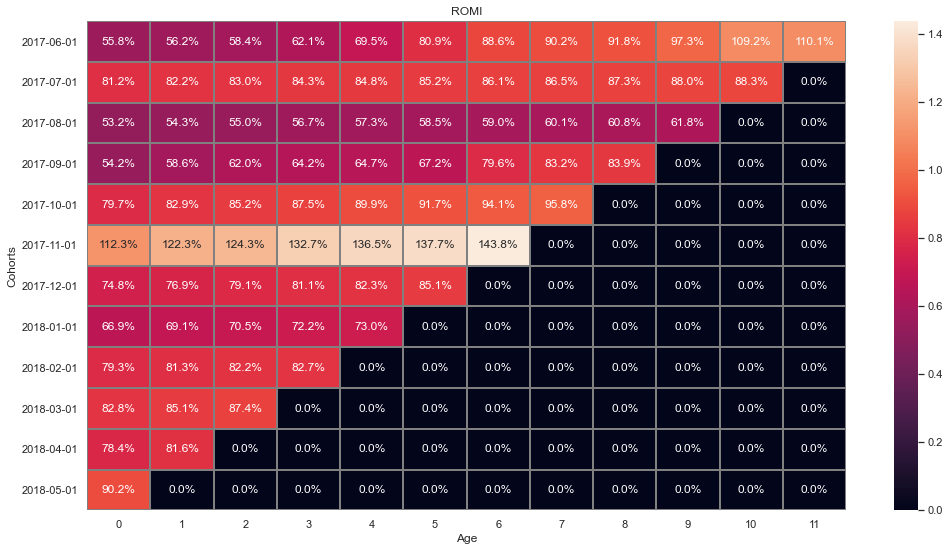

Источник трафика = 5


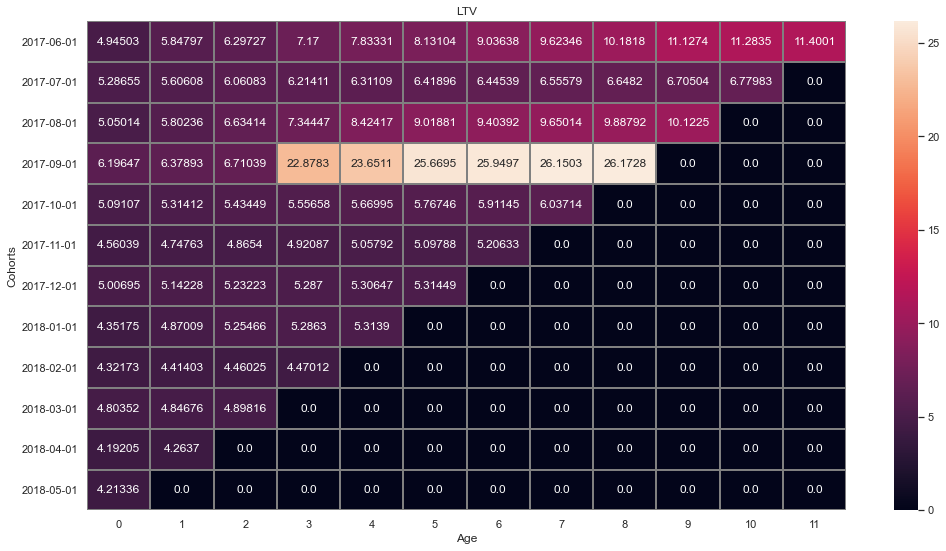

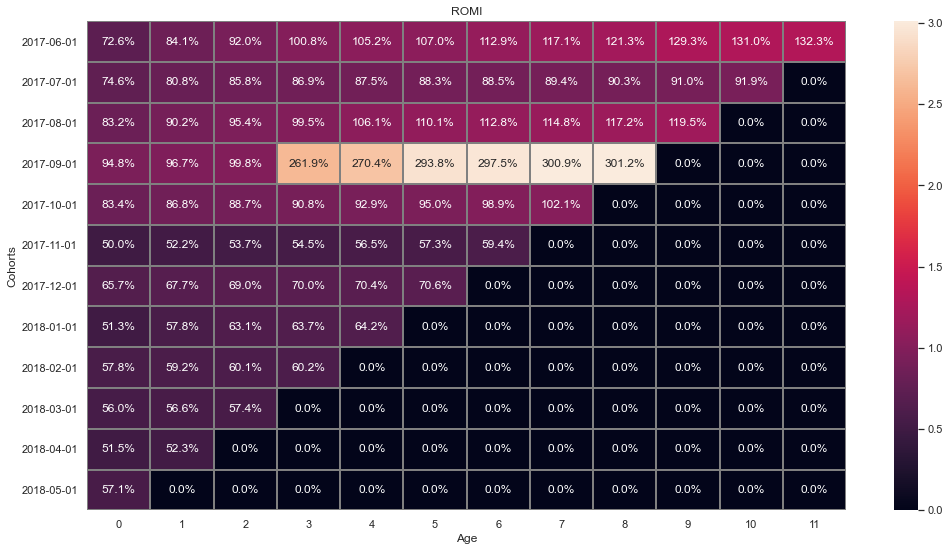

Источник трафика = 9


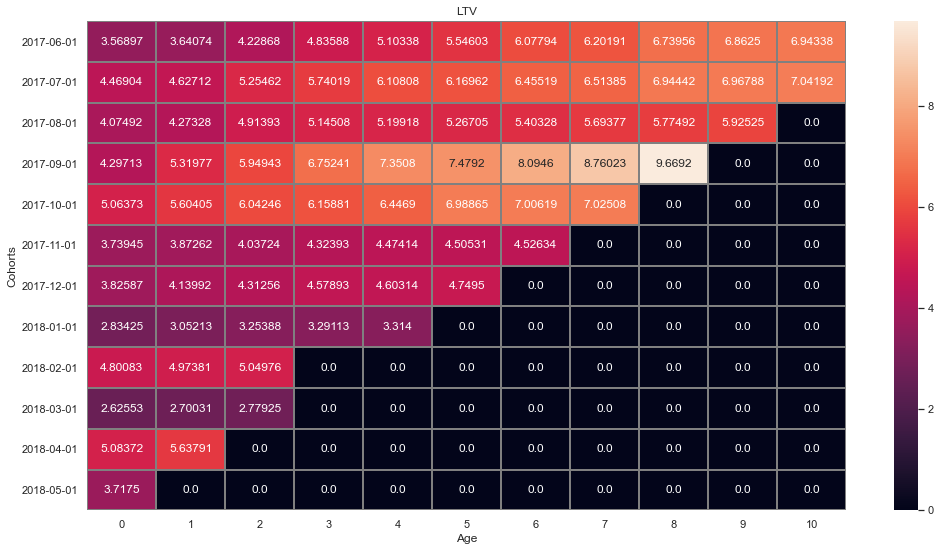

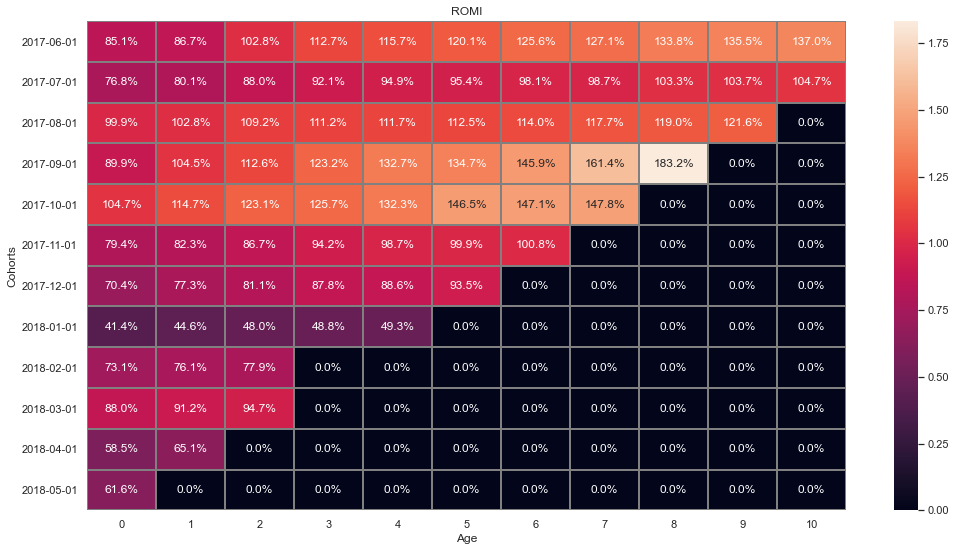

Источник трафика = 10


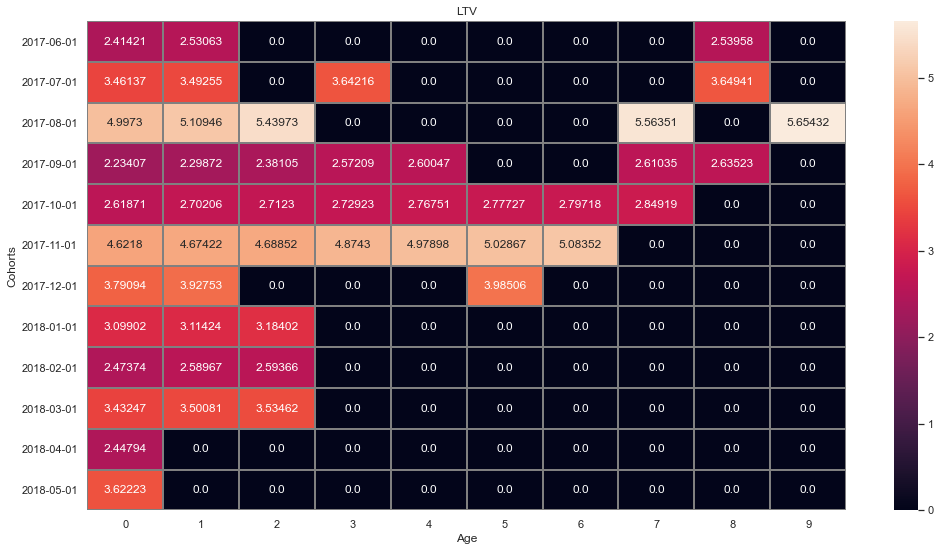

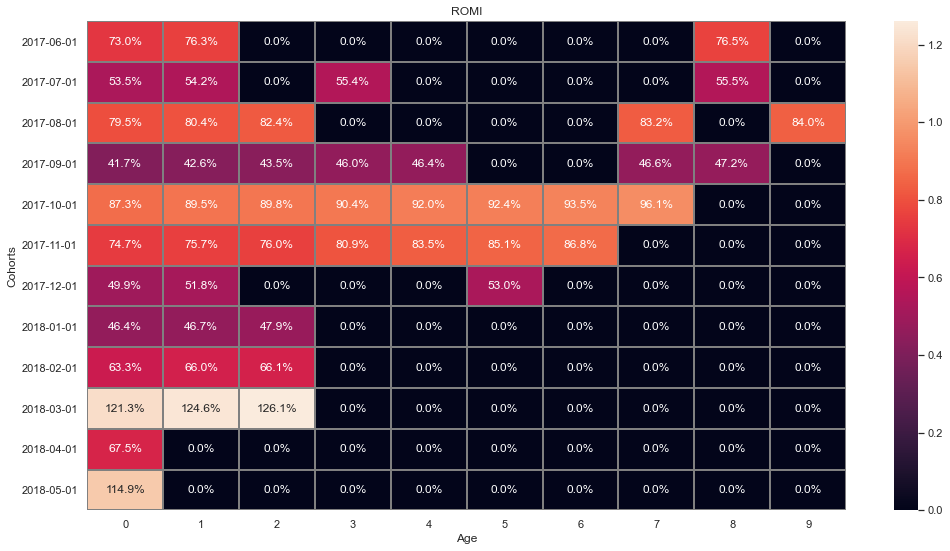

In [175]:
for i in source_n:
    romi(i)

По 10 источнику очень мало покупателей, поэтому получается такая фрагментарная картина

Сравним окупаемость за одинаковые периоды жизни когорт (возьмем 2 месяца и 6 месяцев). Отобрзим максимумы и минимумы в таблице (для повышения читаемости когорты обозначены 2 цифрами соответствующие месяцу когорты, год не указан, но принято, что 2017 когорты с 06 по 12, а 2018 с 01 по 05). 


| Характеритика/источник трафика | 1 | 2 | 3 | 4 | 5 | 9 | 10 |
| --- | --- | --- | --- | --- | --- | --- | --- |
| Самый низкий ROMI за 2 месяц жизни | 01 | 01 | 08 | 08 | 11 | 01 | 09 |
|  | 63.8% | 37.6% | 28.4% | 54.3% | 52.5% | 44.6% | 42.6% |
| Самый высокий ROMI за 2 месяц жизни | 03 | 09 | 09 | 11 | 09 | 10 | 03 |
|  | 179.1% | 98.4% | 44.8% | 122.3% | 99.8% | 114.7% | 124.6% |
| Самый низкий ROMI за 6 месяцев жизни | 12 | 08 | 08 | 08 | 11 | 12 | 12 |
|  | 81.0% | 45.4% | 29.7% | 58.5% | 57.3% | 93.5% | 53% |
| Самый высокий ROMI за 6 месяцев жизни | 06 | 12 | 09 | 11 | 09 | 10 | 10 |
|  | 303.7% | 353.6% | 48.6% | 137.7% | 293.8% | 146.5% | 92.4% |
| Первая окупившаяся когорта | 06, 07 и 03 | 05 | ни одна когорта не окупилась | 11 | 09 | 10 | 03 и 05|
|  | 122.5%, 108.7% и 138.7% на 1 месяце жизни | 104.9% на 1 месяце жизни | - | 112.3% на 1 месяце жизни | 261.9% на 4 месяце жизни | 104.7% на 1 месяце жизни | 121.3% и 114.9% на 1 месяце жизни |

Самые большие расходы были потрачены на 3 источник трафика (далее - ИТ) и показатель romi говорит о том, что расходы еще не окупились. По 1 и 2 ИТ на 6 месяц жизни когорт некоторые показатели достигают значений в 300% - т.е. затраты окупились в 3 раза, это очень хорошие показатели. Также для 1 ИТ в 1 месяц оупились затраты сразу по 3 когортам 06, 07 и 03.  
2 и 9 ИТ имеют схожие максимумы и минимумы показателя romi для 2 и 6 месяцев жизни когорт, но сами когорты по всем характеристикам разные. Можно предположить, что покупатели с когорты 11 в основном пришли по 4 ИТ, а покупатели с когорты 10 пришли по 9 ИТ.  
По графику 5 ИТ можно увидеть необычную ситуацию: для всех когорт показатель romi растет плавно, но в когорте 09 на 4 месяце жизни произошел скачок от 99.8% до 261.9% (4 месяц жизни выпадает на новогодние праздники и видимо, маркетинговая компания благоприятно повлияла именно на эту когорту).  
По 10 ИТ очень мало покупателей, поэтому получилась фрагментарная картина (неполная), особенно выделилась когорта 03 с окупаемойстью в первом месяце, когда по другим когортам окупаемости не замечено совсем (кроме когорты 05, но там аналогично мало покупателей). 

## Вывод и рекомендации

***Итоги аналитики***  
ROMI показал, что единственный источник трафика по которому ни одна когорта не окупила затраты - это 3. Больше трети всех расходов на маркетинг было потрачено именно на маркетинг для 3 источника трафика (141321 у.е.). Можно сделать вывод, что на маркетинг для 3 источника трафика не следует более расходовать бюджет, а необходимо перейти в режим ожидания окупаемости. Рекомендуется анализировать ROMI в динамике в будущем, чтобы оценить стоит ли и в дальнейшем вкладываться в маркетинг для данного источника, потому что текущие показатели говорят что нет.  
  
На 9 и 10 источники трафика было потрачены наименьшие суммы (5517.49 и 5822.49 у.е. соответственно), но и ROMI этих источников имеет средние показатели, окупаемость есть, но она небольшая. Рекомендуется обратить внимание на 9 источник трафика, начиная с 11 когорты с каждым месяцем показатель romi меньше и окупаемость происходит не менее, чем через 6 месяцев. Возможно следует провести маркетинговую компанию для данного источника трафика.  
  
На маркетинг для 1 источника трафика было потрачено 20833.27 у.е. - это 1/15 часть всех затрат - сумма незначительная. Но если посмотреть на показатели LTV и ROMI, то данный источник трафика привлекает самых покупаемых клиентов (максимальный LTV = 33.64 для когорты 06 на 12 месяце жизни, а ROMI достигает 421.8%). Рекомендуется также обратить внимание на 1 источник трафика.  
  
4 и 5 источники трафика имеют средние показатели, но есть выбивающиеся значения. По 4 ИТ когорта 11 уже в 1 месяц окупила затраты на маркетинг, вероятно этому послужил "маркетинговый праздник" - "черная пятница". По 5 ИТ когорта 09 на 4 месяц жизни отличилась большим ростом показателей LTV и ROMI - вероятно этому повлиял ткже праздник, но уже масштабнее - "Новый год". Для этих источников можно проводить маркетинговые компании перед большими праздниками, поток покупок в какой-нибудь когорте да увеличится.  
  
**Итого:** следует обратить внимание на 1 и 9 источники трафика, вероятно необходимо провести акцию для подогрева покупателей. По 4 и 5 следует проводить акции перед большими праздниками. 2, 3 и 10 источники пока оставить под наблюдением за поведением покупателей (за 3 особенно наблюдать). 

***Итоги показателей метрик***  
Если посмотреть на метрики и о чем они говорят, то вот следующие выводы:  
   1. **Продуктовые метрики**  
   В среднем ежедневно количество уникальных пользователей = 907, еженедельно = 5716, ежемесячно = 23228. По графикам данных показателей можно заметить пики и спады прихода новых пользователей, которые могут говорить о результатах проведенных маркетинговых компаний, о праздниках и о возможных сбоях в работе сервиса.
   В среднем 987 пользователей ежедневно заходят на сервис, а средняя продолжительсть 1 сессии (ASL) = 60 секунд.  
   Retention Rate (коэфициент возвращаемости покупателя) в первую неделю убывает по когортам с течением времени. Если для когорты пользователей пришедших с 1 июня по 31 июля 2017 года Retention Rate составляет 7,9%, то для когорты пользователей пришедших с 1 апреля по 31 мая 2018 года уже 4,8%. Так за 11 месяцев коэффициент упал на 3,1%, что является существенным показателем при таких данных (в процентах коэффициент упал на 40 %). Это говорит, что с каждой новой когортой поведение покупателей меняется. Возможно, были выбраны неэффективные источники трафика или ухудшилось качество работы службы поддержки.
   
   2. **Метрики электронной коммерции**  
   наибольшее количество пользователей совершают покупку в первые дни с момента первого посещения сайта, а чаще всего покупка происходит в течение 1 минуты. В среднем за полгода покупатель совершает 1 покупку на сумму от 3.42 до 5.85 условных единиц.
   
   3. **Маркетинговые метрики**  
   Общая сумма расходов равна 329131.62 у.е. Самые большие траты были сделаны на маркетинг для 3 источника трафика = 141321.63 у.е., а самые маленькие траты на источник 9 = 5517.49 у.е. По времени самые большие траты были сделаны в предновогоднюю маркетинговую компанию. Средний CAC на одного покупателя для всего проекта равняется 9.31, что является достаточно высоким показателем. Наибольшие затраты на привлечение одного покупателя замечены в августе 2017 (CAC = 10.796015).

***Итоги когортного анализа:***  
В разрезе когорт мы рассматривали такие метрики как Retention Rate, LTV, CAC и ROMI.  
По метрике Retention Rate самые высокие показатели у 1 когорты (01-06-2017), на 12 месяце жизни RR опустился до 4.5%. С каждой новой когортой этот показатель быстрее падает до отметки в 2%, например когорта 01-03-208 уже на 2 месяце жизни имеет показатель 2.7%.  
По LTV 1 когорта также имеет высокие показатели, но не максимальные среди всех. Когорта 01-09-2017 на 4 месяце жизни резко повысила показатели с 7.2 до 11.2, на это повлияли новогодние праздники. Средние показаели у когорт 01-07-2017 и 01-08-2017. Заметна тенденция уменьшения показателя LTV со временем.  
По ROMI есть анализ в разрезе источников трафика и более подобный вывод отображен в таблице выше. 